# Manipulating the frequency response of a FIR filter

**Topics**
* Manipulation of filter properties

**Learning goals**
* How to shift the passband of a filter
* How to calculate a complementary filter

**Libraries and notebook config:**

In [2]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib inline

## Shifting the passband of a filter

In Exercise 2 we introduced the concept of amplitude modulation and frequency shifting. The process of modulating a signal to displace it's frequency content in the frequency domain may also be used in filter design, where the signal we might modulate is the impulse response of the filter. The modulation property applied to a filter with impulse response $h[n]$ is summarized in equation $1$.

$$\begin{align}
h_2[n] &= h[n] \cdot \cos(\hat{\omega_0}\cdot n) \\ \\
H_2(\hat{\omega}) &= \frac{1}{2}H(\hat{\omega}- \hat{\omega_0}) + \frac{1}{2}H(\hat{\omega}- \hat{\omega_0})
\end{align} \tag{1}$$

If the original filter $h[n]$ was a lowpass filter, the modulated filter $h_2[n]$ will, as the equation shows, have a passband which is shifted towards the higher frequencies. This would result in either a bandpass filter or a highpass filter, depending on the value of the shifting frequency $\omega_0$.

Below is a code cell which uses the remez exchange algorithm to design an optimal lowpass filter with edge frequency $\hat{\omega}_c = 0.2\pi$. In the following tasks, we will use this filter as a basis for creating different types of filters.

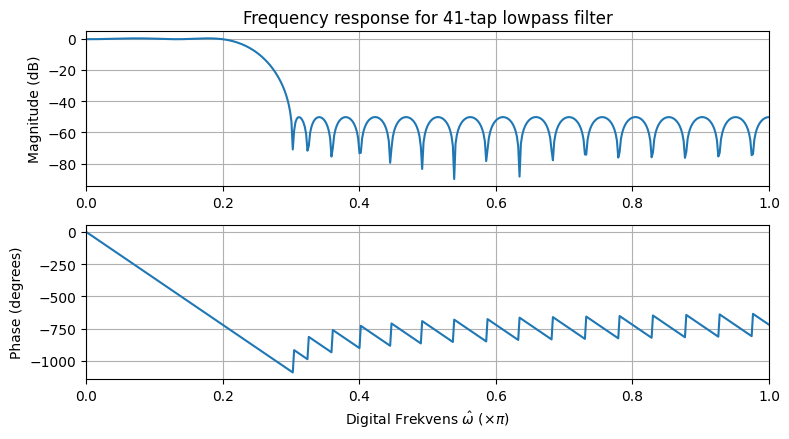

In [3]:
M = 41
f_BP = 0.1
TW = 0.05
hn = sig.remez(M,  # Number of taps
               [0, f_BP, f_BP+TW, 0.5],  # Filter bands (first band: 0<f<f_BP)
               [1, 0],  # Desired magnitude response in respective bands
               weight=[1, 10])  # Relative emphasis on passband ripple vs. stopband attenuation

N = 1024
Hw = np.fft.rfft(hn, N)  # Calculate the frequency response of the filter
w = np.fft.rfftfreq(N)*2*np.pi  # An array of frequency values matching the frequency response

# Extract magnitude response
Hw_mag = np.abs(Hw)
# Extract phase response (use "unwrap" to allow for phase angles >= 180 degrees)
Hw_phase = np.unwrap(np.angle(Hw, deg=True), period=360.0)

plt.close(2); plt.figure(2)
plt.subplot(2,1,1)
plt.title(f'Frequency response for {len(hn)}-tap lowpass filter')
plt.plot(w/np.pi, 20*np.log10(Hw_mag))
plt.grid(True)
plt.xlim([0, 1])
plt.ylabel(r'Magnitude (dB)')
plt.subplot(2,1,2)
plt.plot(w/np.pi, Hw_phase)
plt.grid(True)
plt.xlim([0, 1])
plt.xlabel(r'Digital Frekvens $\hat{\omega} \ (\times \pi)$')
plt.ylabel(r'Phase (degrees)')
plt.tight_layout()

## a) Highpass filter
We wish to transform the above $41$-tap filter $h_{LP}[n]$ represented in the array `hn` to a highpass filter. This may be accomplished using frequency mixing:

$$h_{HP}[n] = h_{LP}[n] \cdot A \cdot \cos(\hat{\omega}_{\text{shift}} \cdot (n-D))$$

Determine the appropriate values for $A$, $\hat{\omega}_{\text{shift}}$ and $D$ which ensures passband gain $\approx 1$ and symmetry of the impulse response $h[n]$. Then, assuming the lowpass filter 's passband has a cutoff frequency $\hat{\omega}_{c}=\frac{\pi}{5}$, what is the cutoff frequency `w_c` for the highpass filter?

Use Python to calculte the new impulse response $h_{HP}[n]$, and plot the filter's frequency response.

In [24]:
A = 1 
w_shift = np.pi  # Submit in radians
D = 20
w_c = np.pi - (np.pi / 5)
# WRITE YOUR CODE IN THIS CELL:

[Here](figures/task3a_lf.png) is a figure showing what the frequency response might look like.

In [25]:
from hashlib import sha1
assert sha1(str(round(A)).encode('utf-8')+b'c76c6').hexdigest() == '288ef1c526eeb538c4d34d778dcdfc9bf1edee1d', 'Wrong answer for A :('
print('Correct answer for A :)')
assert sha1(str(round(D)).encode('utf-8')+b'35160').hexdigest() == 'f9d74920378324a4a0d962bc984b7adf2e055636', 'Wrong answer for D :('
print('Correct answer for D :)')
assert sha1(str(round(w_shift, 3)).encode('utf-8')+b'959e1').hexdigest() == 'f4bfd94be16105fabcd536d436c1bde95b2ab4ec', 'Wrong answer for w_shift :('
print('Correct answer for w_shift :)')
assert sha1(str(round(w_c, 3)).encode('utf-8')+b'62883').hexdigest() == 'd272966465cf39cdc0e2739986788ca5a00d994b', 'Wrong answer for w_c :('
print('Correct answer for w_c :)')

Correct answer for A :)
Correct answer for D :)
Correct answer for w_shift :)
Correct answer for w_c :)


## b) Bandpass filter
We wish to transform the above $41$-tap lowpass filter $h_{LP}[n]$ to a bandpass filter. Once again, this may be accomplished using frequency mixing:

$$h_{BP}[n] = h_{LP}[n] \cdot A \cdot \cos(\hat{\omega}_{\text{shift}} \cdot (n-D))$$

Determine the appropriate values for $A$, $\hat{\omega}_{\text{shift}}$ and $D$ which ensures the following filter properties:
- Passband gain $\approx 1$
- Impulse response symmetry ($h[n] = h[M-1-n])$
- Lower passband cutoff frequency $\omega_1 = \frac{4\pi}{10}$
- Upper passband cutoff frequency $\omega_2 = \frac{8\pi}{10}$

Use Python to calculte the new impulse response $h_{BP}[n]$, and plot the filter's frequency response.

In [20]:
A = 2
w_shift = (3 * np.pi) / 5 # Submit in radians
D = 20
# WRITE YOUR CODE IN THIS CELL:

[Here](figures/task3b_lf.png) is a figure showing what the frequency response might look like.

In [21]:
from hashlib import sha1
assert sha1(str(round(A)).encode('utf-8')+b'cc656').hexdigest() == '737cedee1f08ce7d559cf6be91ccdefe4dcbc591', 'Wrong answer for A :('
print('Correct answer for A :)')
assert sha1(str(round(D)).encode('utf-8')+b'208ba').hexdigest() == '19ba97eb60c5a5d9648043902f0f9769cd3d4a96', 'Wrong answer for D :('
print('Correct answer for D :)')
assert sha1(str(round(w_shift, 3)).encode('utf-8')+b'8738d').hexdigest() == 'e244250d7c8a38f20f71248c009d5a2fdd509360', 'Wrong answer for w_shift :('
print('Correct answer for w_shift :)')

Correct answer for A :)
Correct answer for D :)
Correct answer for w_shift :)




### On complementary FIR filters
A complementary filter is a filter whose frequency response $H_{comp}(\hat{\omega})$ complements the frequency response of a different filter $H(\hat{\omega})$ in such a way that:
$$|H_{comp}(\hat{\omega})|  = 1 - |H(\hat{\omega})|$$


When working with *linear phase* FIR filters, finding the complimentary filter is luckily quite simple. All we need to do is create an allpass filter with the same group delay as the filter $h[n]$ we wish to complement, and subtract the impulse response $h[n]$. The equation for the complementary impulse response becomes:

$$h_{\text{comp}}[n] = \delta[n-D] - h[n]$$

assuming:
- $h[n]$ is symmetric
- The number of filter taps $M$ is an odd number
- the delay $D$ ensures that $h_{\text{comp}}[n]$ will also be symmetric

## c) Complementary filter

Use the bandpass filter from problem **b)** as a basis and create it's *complementary* filter `h_comp`. What category of filter is `h_comp`? (lowpass, highpass, bandpass, bandstop)


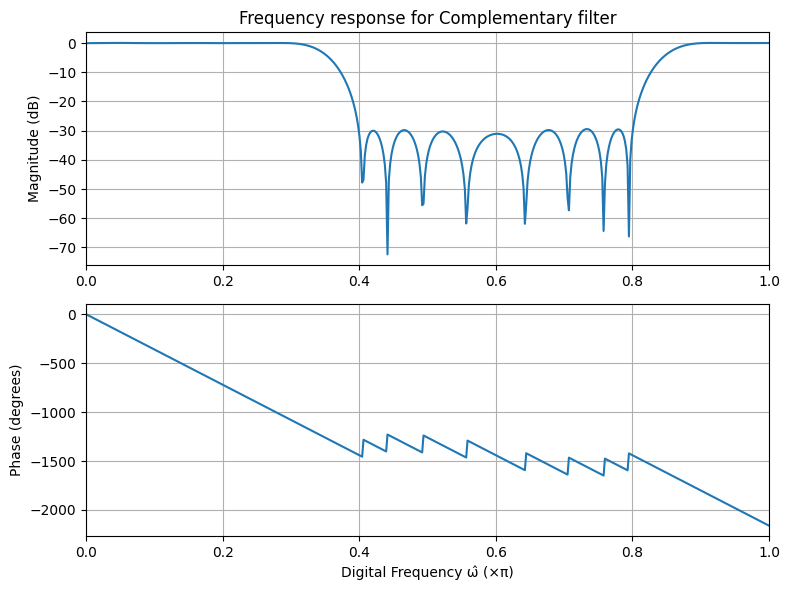

In [19]:
# WRITE YOUR CODE IN THIS CELL:
n = np.arange(len(hn))
h_BP = hn * A * np.cos(w_shift * (n - D))
delta = np.zeros(len(h_BP))
delta[D] = 1

h_comp = delta - h_BP
Hw_comp = np.fft.rfft(h_comp, N)

Hw_comp_mag = np.abs(Hw_comp)
Hw_comp_phase = np.unwrap(np.angle(Hw_comp, deg=True), period=360.0)

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title('Frequency response for Complementary filter')
plt.plot(w/np.pi, 20*np.log10(Hw_comp_mag))
plt.grid(True)
plt.xlim([0, 1])
plt.ylabel('Magnitude (dB)')
plt.subplot(2,1,2)
plt.plot(w/np.pi, Hw_comp_phase)
plt.grid(True)
plt.xlim([0, 1])
plt.xlabel('Digital Frequency ω̂ (×π)')
plt.ylabel('Phase (degrees)')
plt.tight_layout()
plt.show()

[Here](figures/task3c_lf.png) is a figure showing what the frequency response might look like.